In [9]:
import pandas as pd
import numpy as np
import scipy.stats as st

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
%run get_lab.py

enter phystech e-mail
 samohin.vyu@phystech.edu


Your tasks are 1.1, 2.3, 3.2, 4.1


# Задача 3.2

Дана статистика бросков для игроков NBA

Выборка представляет собой статистику бросков для различных игроков NBA. Для каждого игрока известны:

* количество успешных бросков в домашних играх (score_home)
* количество бросков в домашних играх (atm_home)
* количество успешных бросков в гостевых играх (score_away)
* количество бросков в гостевых играх (atm_away)

Требуется определить, есть ли разница в успехе бросков у игроков в домашних и гостевых играх.

У какого процента игроков разница в успехе существенна?

In [4]:
data = pd.read_csv('data/nba.csv', index_col=0)

In [5]:
data.head()

,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
7,A. Johnson,ATL,30,34,24,28,64,52
10,A. Johnson,TOR,63,57,44,38,120,82
15,Abdur-Rahim,SAC,114,124,84,90,238,174
22,Afflalo,DEN,236,284,189,227,520,416
23,Afflalo,DET,75,88,62,67,163,129


In [7]:
data['home'] = data['score_home']/data['atm_home']
data['away'] = data['score_away']/data['atm_away']

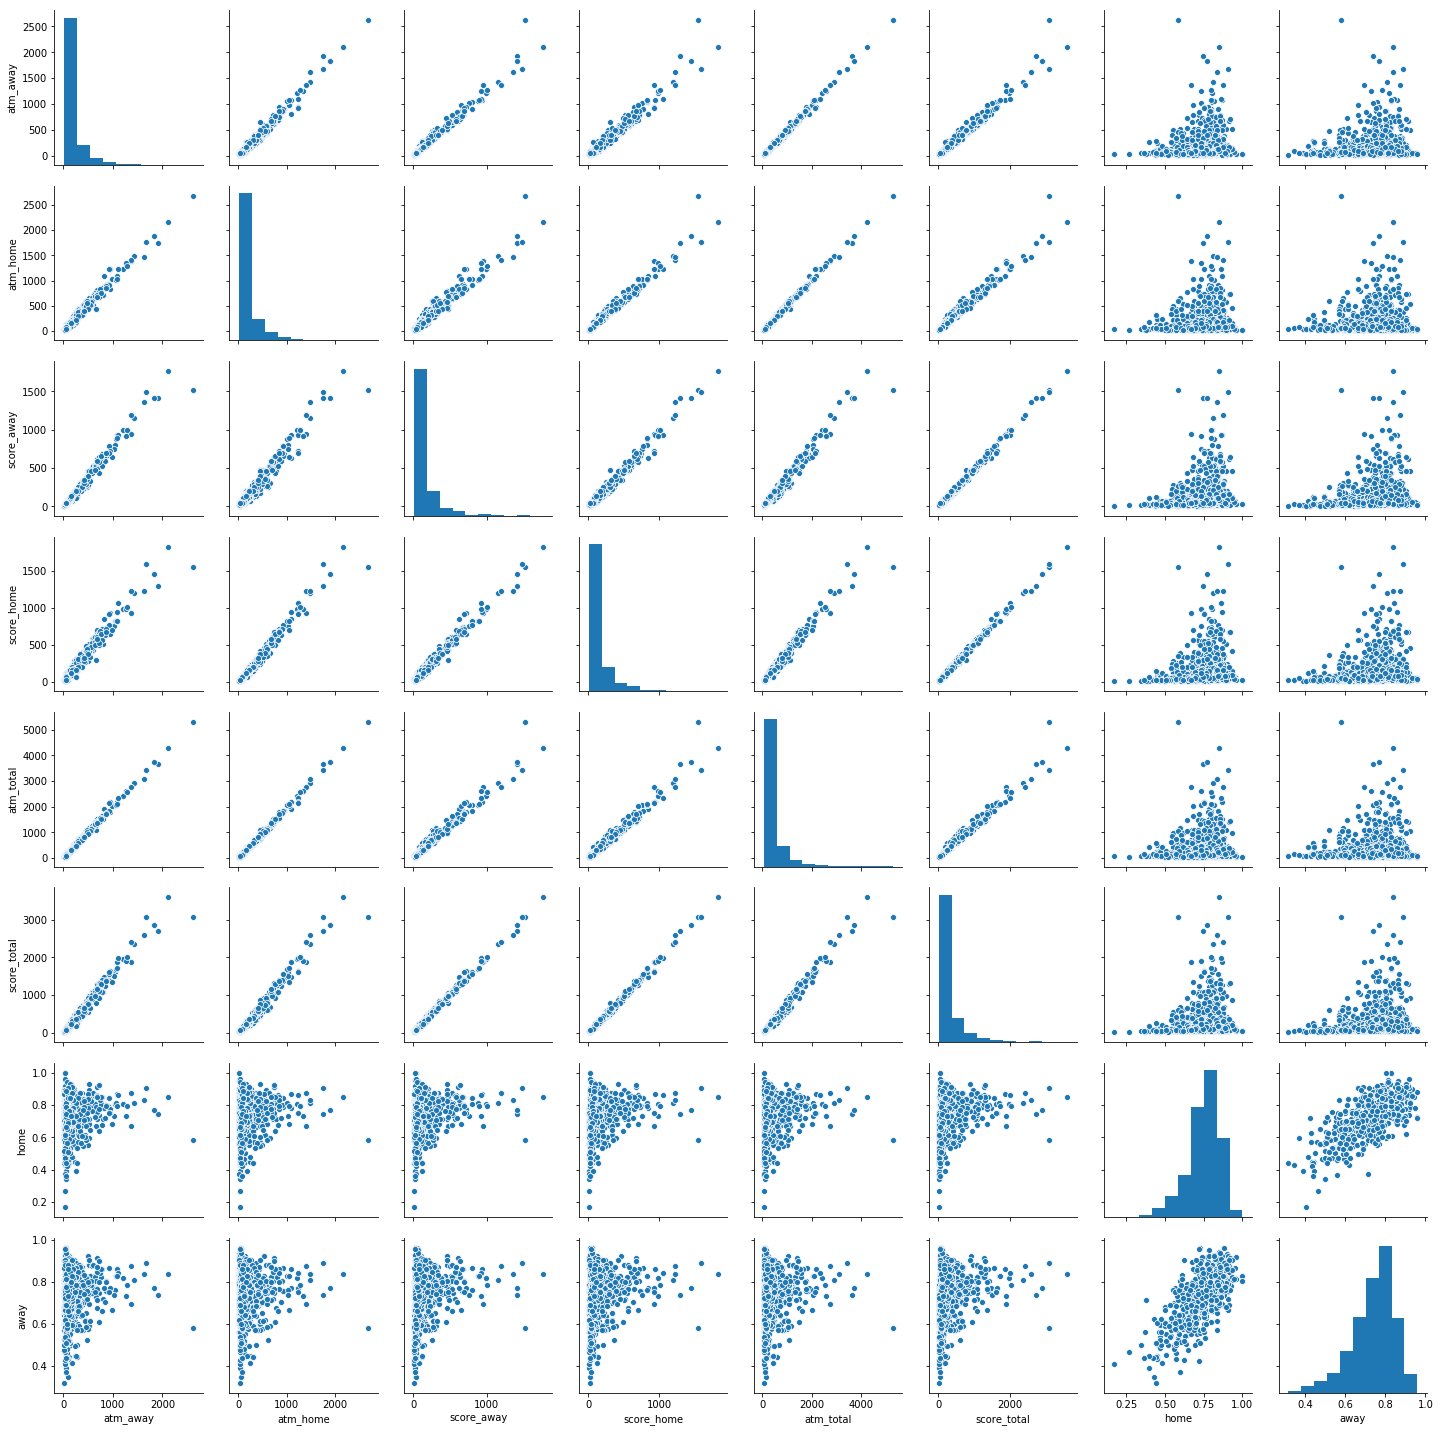

In [8]:
import seaborn as sns
sns.pairplot(data=data)

In [10]:
from statsmodels.stats.proportion import proportions_ztest
p_vals = []
for i, row in data.iterrows():
    count = row["score_away"], row["score_home"]
    nobs = row["atm_away"], row["atm_home"]
    p_vals.append(proportions_ztest(count, nobs, alternative="two-sided")[1])
p_vals = np.array(p_vals)

In [11]:
# число игроков, для которых броски дома и на выезде существенно отличаются (без поправки на многомерность)
sum(p_vals <= 0.05)

65

Применим метод Холма, поскольку имеем дело с множественной проверкой гипотезой.

In [12]:
from statsmodels.stats.multitest import multipletests

multipletests(p_vals, alpha=0.05, method='holm')[0].sum()

0

In [13]:
multipletests(p_vals, alpha=0.05, method='fdr_bh')[0].sum()

0

In [14]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

lm = ols('away ~ C(team) + home + C(team):home',  data=data).fit()

In [16]:
sm.stats.anova_lm(lm)


,df,sum_sq,mean_sq,F,PR(>F)
C(team),31.0,0.276697,0.008926,1.775005,6.056142e-03
home,1.0,5.621832,5.621832,1117.980569,2.106071e-158
C(team):home,31.0,0.175621,0.005665,1.126604,2.914224e-01
Residual,872.0,4.384904,0.005029,NaN,NaN


Считаю, что команда влияет на соотношение между результативностью дома и на выезде, поэтому объединять данные по игрокам некорректно.